In [1]:
%pip install tensorflow pandas numpy scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Reshape, Flatten, GRU
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

In [3]:

# Calculate the accuracy of each model
def evaluateModel(test,pred,val,pred_val):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

  print('\n** Validate **')
  val_mae = mean_absolute_error(val, pred_val)
  print('MAE: ', val_mae)

  val_ape = np.abs((val - pred_val) / val)
  val_mape = np.mean(val_ape) * 100
  print('MAPE: ', val_mape)

  val_mse = mean_squared_error(val, pred_val)
  val_rmse = np.sqrt(val_mse)
  print('RMSE: ', val_rmse)

In [4]:
# Read in the Gold dataset from a CSV file
df=pd.read_csv("D:/Thái/Phân tích thống kê/Platinum_data_filtered.csv")

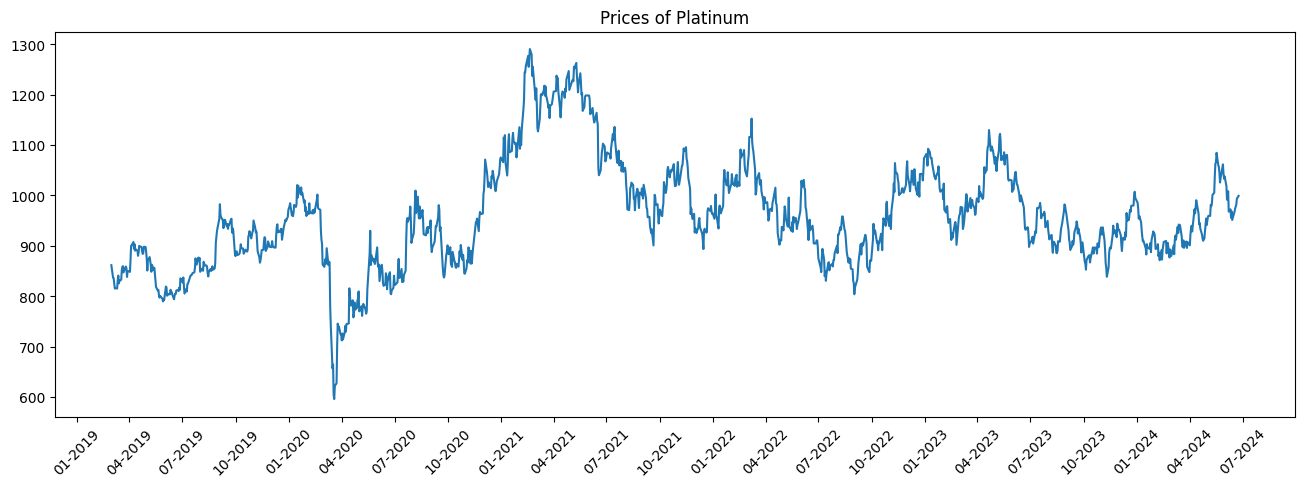

In [5]:
# Format column Date
df.index = pd.to_datetime(df.date,format='%m/%d/%Y')

# Flip the column
#df = df.iloc[::-1]

# Create new Dataframe
df1 = pd.DataFrame(df, columns=['date', 'close'])
df1.drop('date', axis = 1, inplace = True)

# Plot the 'close' column of the 'df' DataFrame
plt.figure(figsize=(16,5))
plt.plot(df1['close'])
plt.title('Prices of Platinum')

# x-axis format to show only the year
from matplotlib.dates import DateFormatter, MonthLocator
ax = plt.gca()
ax.xaxis.set_major_formatter(DateFormatter('%m-%Y'))  
ax.xaxis.set_major_locator(MonthLocator(interval=3))
plt.xticks(rotation=45) 

plt.show()

Split dataset (7-2-1)

In [6]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

# Split the data
train_size = int(0.7 * len(sc_train))
test_size = int(0.2 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [7]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(5, len(train_data)):
    # Append the last 5 values to the x_train array
    x_train.append(sc_train[i-5:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [8]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [9]:
# Build the model
model = Sequential()

# Add an GRU layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(GRU(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an GRU layer with 50 units
model.add(GRU(50,return_sequences=True))

# Add an GRU layer with 50 units
model.add(GRU(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_7_2_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

c:\Users\tpc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/80

Epoch 1: loss improved from inf to 0.19880, saving model to save_model_7_2_1.keras
19/19 - 15s - 770ms/step - loss: 0.1988
Epoch 2/80

Epoch 2: loss improved from 0.19880 to 0.07604, saving model to save_model_7_2_1.keras
19/19 - 0s - 21ms/step - loss: 0.0760
Epoch 3/80

Epoch 3: loss improved from 0.07604 to 0.04654, saving model to save_model_7_2_1.keras
19/19 - 0s - 21ms/step - loss: 0.0465
Epoch 4/80

Epoch 4: loss improved from 0.04654 to 0.03477, saving model to save_model_7_2_1.keras
19/19 - 0s - 20ms/step - loss: 0.0348
Epoch 5/80

Epoch 5: loss did not improve from 0.03477
19/19 - 0s - 15ms/step - loss: 0.0349
Epoch 6/80

Epoch 6: loss improved from 0.03477 to 0.03416, saving model to save_model_7_2_1.keras
19/19 - 0s - 22ms/step - loss: 0.0342
Epoch 7/80

Epoch 7: loss improved from 0.03416 to 0.03313, saving model to save_model_7_2_1.keras
19/19 - 0s - 21ms/step - loss: 0.0331
Epoch 8/80

Epoch 8: loss improved from 0.03313 to 0.03223, saving model to save_model_

In [10]:

# Load the best model from the save_model.keras file
final_model = load_model('save_model_7_2_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 160ms/step


In [11]:
# Preprocess the test data
test = df1[len(train_data)-5:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(5, test.shape[0]):
    x_test.append(sc_test[i-5:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [12]:
# Preprocess the validate data
val = df1[train_size+test_size-5:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(5, val.shape[0]):
    x_val.append(sc_val[i-5:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [13]:
# Forecast of test and val data
train_predict=model.predict(x_train)
y_pred=model.predict(x_test)
y_pred_val=model.predict(x_val)

# Standardization of y_pred and y_pred_val data
train_predict=sc.inverse_transform(train_predict)
y_pred=sc.inverse_transform(y_pred)
y_pred_val=sc.inverse_transform(y_pred_val)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [14]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 5:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 5)
[0.535338995249748, 0.5444076579818626, 0.5552036850439039, 0.5726212753706637, 0.5803944148553333]


In [15]:
# Initialize variables
lst_output = []
n_steps = 5
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 5):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.5629212856292725], [0.5452319979667664], [0.5292012095451355], [0.5160819888114929], [0.5045208930969238], [0.49327173829078674], [0.4821995198726654], [0.4713779091835022], [0.46094372868537903], [0.45094048976898193], [0.44135233759880066], [0.43215423822402954], [0.4233264923095703], [0.4148569405078888], [0.40673571825027466], [0.3989527225494385], [0.39149707555770874], [0.384357750415802], [0.3775235712528229], [0.37098369002342224], [0.3647272288799286], [0.3587437868118286], [0.35302305221557617], [0.3475549519062042], [0.3423294723033905], [0.33733707666397095], [0.3325684070587158], [0.3280143141746521], [0.3236660361289978], [0.31951501965522766]]


In [16]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['date'].astype(str).tolist()

# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in datelist_train]

# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [17]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[986.96141713]
 [974.67266899]
 [963.53608027]
 [954.42215763]
 [946.39066443]
 [938.57587659]
 [930.88400646]
 [923.36623351]
 [916.11760832]
 [909.16835824]
 [902.50746893]
 [896.11754929]
 [889.98491421]
 [884.10111657]
 [878.45930347]
 [873.05245636]
 [867.87301839]
 [862.91332921]
 [858.16562495]
 [853.62236946]
 [849.2760059 ]
 [845.1193087 ]
 [841.14511437]
 [837.34642509]
 [833.71628441]
 [830.24806716]
 [826.93527238]
 [823.77154406]
 [820.7507953 ]
 [817.86708415]]


Margin of Error: 96.52293796642233
Lower Bound of Future Prediction: [[890.43847916]
 [878.14973102]
 [867.0131423 ]
 [857.89921966]
 [849.86772647]
 [842.05293862]
 [834.36106849]
 [826.84329554]
 [819.59467035]
 [812.64542028]
 [805.98453096]
 [799.59461133]
 [793.46197624]
 [787.5781786 ]
 [781.9363655 ]
 [776.52951839]
 [771.35008042]
 [766.39039125]
 [761.64268698]
 [757.09943149]
 [752.75306794]
 [748.59637073]
 [744.62217641]
 [740.82348712]
 [737.19334644]
 [733.72512919]
 [730.41233442]
 [727.24860609]
 [724.22785733]
 [721.34414619]]
Upper Bound of Future Prediction: [[1083.48435509]
 [1071.19560695]
 [1060.05901824]
 [1050.94509559]
 [1042.9136024 ]
 [1035.09881456]
 [1027.40694442]
 [1019.88917148]
 [1012.64054628]
 [1005.69129621]
 [ 999.0304069 ]
 [ 992.64048726]
 [ 986.50785217]
 [ 980.62405454]
 [ 974.98224143]
 [ 969.57539432]
 [ 964.39595636]
 [ 959.43626718]
 [ 954.68856292]
 [ 950.14530743]
 [ 945.79894387]
 [ 941.64224666]
 [ 937.66805234]
 [ 933.86936306]
 [ 930.2

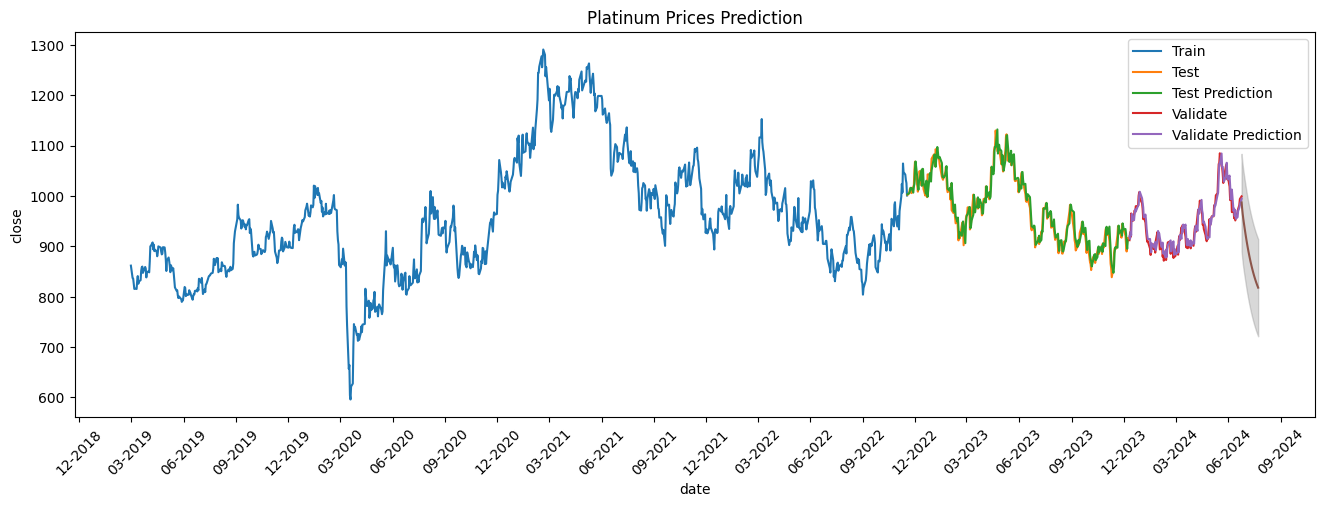

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#   Create a confidence interval for the prediction
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for 95% confidence level

# Create error range for Future Prediction
std_dev = np.std(y_pred_future)  # Standard deviation of future prediction
margin_of_error = z_score * std_dev

# Calculate the confidence interval for Future Prediction
lower_bound = y_pred_future - margin_of_error
upper_bound = y_pred_future + margin_of_error

# Print out the confidence interval value
print("Margin of Error:", margin_of_error)
print("Lower Bound of Future Prediction:", lower_bound)
print("Upper Bound of Future Prediction:", upper_bound)

# Calculate the reliability of the model
mean_prediction = np.mean(y_pred_future)
confidence_interval_range = upper_bound - lower_bound
confidence_score = 1 - (np.mean(confidence_interval_range) / mean_prediction)
print("Confidence Score:", confidence_score)

# Function to calculate confidence interval
def calculate_confidence_interval(predictions, confidence_level=0.95):
    z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for confidence level
    std_dev = np.std(predictions)  # Standard deviation of prediction
    margin_of_error = z_score * std_dev
    lower_bound = predictions - margin_of_error
    upper_bound = predictions + margin_of_error
    return lower_bound, upper_bound, margin_of_error

#   Use the function to calculate the confidence interval for Future Prediction
lower_bound, upper_bound, margin_of_error = calculate_confidence_interval(y_pred_future)

# Convert confidence intervals to DataFrames for plotting convenience
PREDICTIONS_FUTURE_LOWER = pd.DataFrame(lower_bound, columns=['close']).set_index(pd.Series(datelist_future))
PREDICTIONS_FUTURE_UPPER = pd.DataFrame(upper_bound, columns=['close']).set_index(pd.Series(datelist_future))

# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index, train_data.close)
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)
plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('date')
plt.ylabel('close')
plt.title('Platinum Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# x-axis format to show only the year
from matplotlib.dates import DateFormatter, MonthLocator
ax = plt.gca()
ax.xaxis.set_major_formatter(DateFormatter('%m-%Y'))  
ax.xaxis.set_major_locator(MonthLocator(interval=3))
plt.xticks(rotation=45)  
plt.show()



In [19]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  13.398404057340805
MAPE:  1.3774873423645906
RMSE:  16.96386841190286

** Validate **
MAE:  12.470483671729248
MAPE:  1.3195855941518666
RMSE:  15.41306564219148


Split dataset (6-3-1)

In [20]:
# Split the data
train_size = int(0.6 * len(sc_train))
test_size = int(0.3 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [21]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(5, len(train_data)):
    # Append the last 5 values to the x_train array
    x_train.append(sc_train[i-5:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [22]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [23]:
# Build the model
model = Sequential()

# Add an GRU layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(GRU(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an GRU layer with 50 units
model.add(GRU(50,return_sequences=True))

# Add an GRU layer with 50 units
model.add(GRU(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_6_3_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

c:\Users\tpc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/80

Epoch 1: loss improved from inf to 0.19160, saving model to save_model_6_3_1.keras
16/16 - 16s - 997ms/step - loss: 0.1916
Epoch 2/80

Epoch 2: loss improved from 0.19160 to 0.07752, saving model to save_model_6_3_1.keras
16/16 - 0s - 24ms/step - loss: 0.0775
Epoch 3/80

Epoch 3: loss improved from 0.07752 to 0.04918, saving model to save_model_6_3_1.keras
16/16 - 0s - 23ms/step - loss: 0.0492
Epoch 4/80

Epoch 4: loss improved from 0.04918 to 0.03508, saving model to save_model_6_3_1.keras
16/16 - 1s - 41ms/step - loss: 0.0351
Epoch 5/80

Epoch 5: loss improved from 0.03508 to 0.03288, saving model to save_model_6_3_1.keras
16/16 - 1s - 41ms/step - loss: 0.0329
Epoch 6/80

Epoch 6: loss improved from 0.03288 to 0.03229, saving model to save_model_6_3_1.keras
16/16 - 0s - 23ms/step - loss: 0.0323
Epoch 7/80

Epoch 7: loss did not improve from 0.03229
16/16 - 0s - 16ms/step - loss: 0.0326
Epoch 8/80

Epoch 8: loss did not improve from 0.03229
16/16 - 0s - 16ms/step - loss: 0

In [24]:
# Load the best model from the save_model.keras file
final_model = load_model('save_model_6_3_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)
     

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step


In [25]:
# Preprocess the test data
test = df1[len(train_data)-5:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(5, test.shape[0]):
    x_test.append(sc_test[i-5:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [26]:
# Preprocess the validate data
val = df1[train_size+test_size-5:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(5, val.shape[0]):
    x_val.append(sc_val[i-5:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [27]:

# Forecast of test and val data
train_predict=model.predict(x_train)
y_pred=model.predict(x_test)
y_pred_val=model.predict(x_val)

# Standardization of y_pred and y_pred_val data
train_predict=sc.inverse_transform(train_predict)
y_pred=sc.inverse_transform(y_pred)
y_pred_val=sc.inverse_transform(y_pred_val)

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [28]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 5:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 5)
[0.535338995249748, 0.5444076579818626, 0.5552036850439039, 0.5726212753706637, 0.5803944148553333]


In [29]:
# Initialize variables
lst_output = []
n_steps = 5
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 5):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.5796594023704529], [0.578940749168396], [0.5788676142692566], [0.5795098543167114], [0.5803494453430176], [0.5811234712600708], [0.5818321704864502], [0.582512378692627], [0.5831920504570007], [0.5838767886161804], [0.584563672542572], [0.5852499008178711], [0.5859344601631165], [0.586617648601532], [0.5872998237609863], [0.5879810452461243], [0.5886613130569458], [0.5893407464027405], [0.590019166469574], [0.5906966328620911], [0.5913734436035156], [0.592049241065979], [0.5927242636680603], [0.5933985114097595], [0.5940720438957214], [0.5947449803352356], [0.5954172015190125], [0.5960888266563416], [0.5967598557472229], [0.5974302291870117]]


In [30]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[ 998.58938683]
 [ 998.09013845]
 [ 998.03933163]
 [ 998.48549579]
 [ 999.06875968]
 [ 999.60647548]
 [1000.09880884]
 [1000.57134948]
 [1001.04351745]
 [1001.51920505]
 [1001.99638332]
 [1002.4731061 ]
 [1002.94866948]
 [1003.42328048]
 [1003.89718757]
 [1004.37043213]
 [1004.84301418]
 [1005.31501653]
 [1005.78631495]
 [1006.25695085]
 [1006.72713127]
 [1007.19660777]
 [1007.66554597]
 [1008.13394588]
 [1008.60184889]
 [1009.06933784]
 [1009.5363299 ]
 [1010.00290788]
 [1010.46907179]
 [1010.93478022]]


Margin of Error: 7.882321860199846
Lower Bound of Future Prediction: [[ 990.70706497]
 [ 990.20781659]
 [ 990.15700977]
 [ 990.60317393]
 [ 991.18643782]
 [ 991.72415362]
 [ 992.21648698]
 [ 992.68902762]
 [ 993.16119559]
 [ 993.63688319]
 [ 994.11406146]
 [ 994.59078424]
 [ 995.06634762]
 [ 995.54095862]
 [ 996.01486571]
 [ 996.48811027]
 [ 996.96069232]
 [ 997.43269467]
 [ 997.90399309]
 [ 998.37462899]
 [ 998.84480941]
 [ 999.31428591]
 [ 999.78322411]
 [1000.25162402]
 [1000.71952703]
 [1001.18701598]
 [1001.65400804]
 [1002.12058602]
 [1002.58674993]
 [1003.05245836]]
Upper Bound of Future Prediction: [[1006.47170869]
 [1005.97246031]
 [1005.92165349]
 [1006.36781765]
 [1006.95108154]
 [1007.48879734]
 [1007.9811307 ]
 [1008.45367134]
 [1008.92583931]
 [1009.40152691]
 [1009.87870518]
 [1010.35542796]
 [1010.83099134]
 [1011.30560234]
 [1011.77950943]
 [1012.25275399]
 [1012.72533604]
 [1013.19733839]
 [1013.66863681]
 [1014.13927271]
 [1014.60945313]
 [1015.07892963]
 [1015.54786

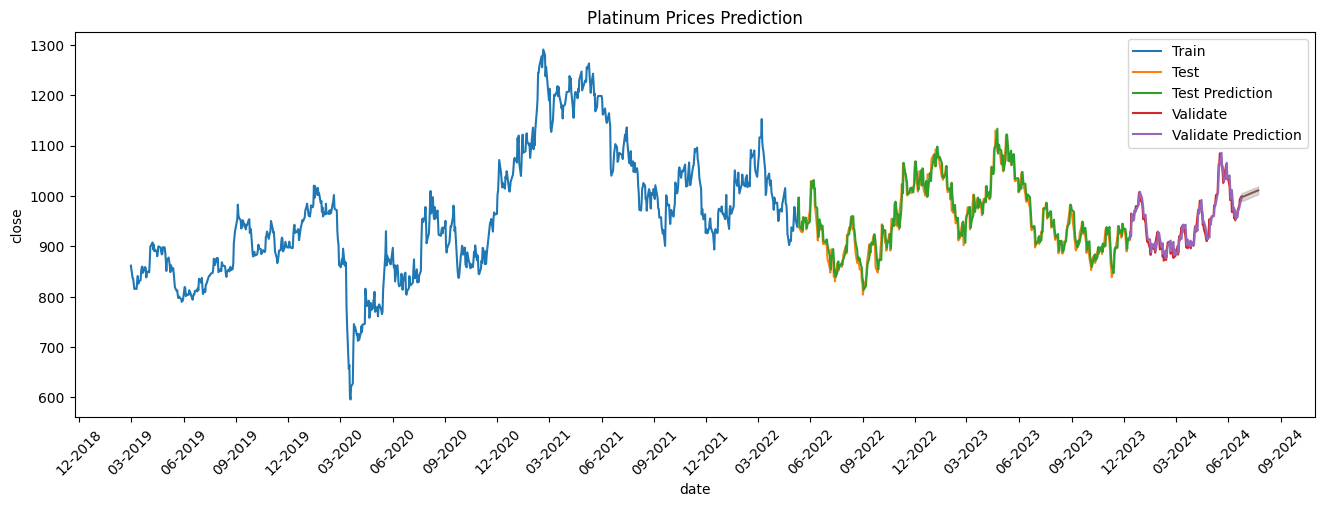

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#   Create a confidence interval for the prediction
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for 95% confidence level

# Create error range for Future Prediction
std_dev = np.std(y_pred_future)  # Standard deviation of future prediction
margin_of_error = z_score * std_dev

# Calculate the confidence interval for Future Prediction
lower_bound = y_pred_future - margin_of_error
upper_bound = y_pred_future + margin_of_error

# Print out the confidence interval value
print("Margin of Error:", margin_of_error)
print("Lower Bound of Future Prediction:", lower_bound)
print("Upper Bound of Future Prediction:", upper_bound)

# Calculate the reliability of the model
mean_prediction = np.mean(y_pred_future)
confidence_interval_range = upper_bound - lower_bound
confidence_score = 1 - (np.mean(confidence_interval_range) / mean_prediction)
print("Confidence Score:", confidence_score)

# Function to calculate confidence interval
def calculate_confidence_interval(predictions, confidence_level=0.95):
    z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for confidence level
    std_dev = np.std(predictions)  # Standard deviation of prediction
    margin_of_error = z_score * std_dev
    lower_bound = predictions - margin_of_error
    upper_bound = predictions + margin_of_error
    return lower_bound, upper_bound, margin_of_error

#   Use the function to calculate the confidence interval for Future Prediction
lower_bound, upper_bound, margin_of_error = calculate_confidence_interval(y_pred_future)

# Convert confidence intervals to DataFrames for plotting convenience
PREDICTIONS_FUTURE_LOWER = pd.DataFrame(lower_bound, columns=['close']).set_index(pd.Series(datelist_future))
PREDICTIONS_FUTURE_UPPER = pd.DataFrame(upper_bound, columns=['close']).set_index(pd.Series(datelist_future))

# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index, train_data.close)
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)
plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('date')
plt.ylabel('close')
plt.title('Platinum Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# x-axis format to show only the year
from matplotlib.dates import DateFormatter, MonthLocator
ax = plt.gca()
ax.xaxis.set_major_formatter(DateFormatter('%m-%Y'))  
ax.xaxis.set_major_locator(MonthLocator(interval=3))
plt.xticks(rotation=45)  
plt.show()



In [32]:

evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  14.186248472587549
MAPE:  1.4888495304551084
RMSE:  17.979509547890665

** Validate **
MAE:  12.4578568307977
MAPE:  1.3177681036822888
RMSE:  15.394661369077571


Split dataset (5-3-2)

In [33]:
# Split the data
train_size = int(0.5 * len(sc_train))
test_size = int(0.3 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [34]:

# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(5, len(train_data)):
    # Append the last 5 values to the x_train array
    x_train.append(sc_train[i-5:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [35]:

# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [36]:
# Build the model
model = Sequential()

# Add an GRU layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(GRU(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an GRU layer with 50 units
model.add(GRU(50,return_sequences=True))

# Add an GRU layer with 50 units
model.add(GRU(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_5_3_2.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

c:\Users\tpc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/80

Epoch 1: loss improved from inf to 0.18749, saving model to save_model_5_3_2.keras
14/14 - 18s - 1s/step - loss: 0.1875
Epoch 2/80

Epoch 2: loss improved from 0.18749 to 0.06699, saving model to save_model_5_3_2.keras
14/14 - 0s - 35ms/step - loss: 0.0670
Epoch 3/80

Epoch 3: loss improved from 0.06699 to 0.04861, saving model to save_model_5_3_2.keras
14/14 - 0s - 27ms/step - loss: 0.0486
Epoch 4/80

Epoch 4: loss improved from 0.04861 to 0.03437, saving model to save_model_5_3_2.keras
14/14 - 0s - 26ms/step - loss: 0.0344
Epoch 5/80

Epoch 5: loss improved from 0.03437 to 0.03376, saving model to save_model_5_3_2.keras
14/14 - 0s - 24ms/step - loss: 0.0338
Epoch 6/80

Epoch 6: loss improved from 0.03376 to 0.03294, saving model to save_model_5_3_2.keras
14/14 - 0s - 28ms/step - loss: 0.0329
Epoch 7/80

Epoch 7: loss did not improve from 0.03294
14/14 - 0s - 19ms/step - loss: 0.0335
Epoch 8/80

Epoch 8: loss did not improve from 0.03294
14/14 - 0s - 18ms/step - loss: 0.03

In [37]:
# Load the best model from the save_model.keras file
final_model = load_model('save_model_5_3_2.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step


In [38]:
# Preprocess the test data
test = df1[len(train_data)-5:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(5, test.shape[0]):
    x_test.append(sc_test[i-5:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [39]:
# Preprocess the validate data
val = df1[train_size+test_size-5:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(5, val.shape[0]):
    x_val.append(sc_val[i-5:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values
  

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [40]:

# Forecast of test and val data
train_predict=model.predict(x_train)
y_pred=model.predict(x_test)
y_pred_val=model.predict(x_val)

# Standardization of y_pred and y_pred_val data
train_predict=sc.inverse_transform(train_predict)
y_pred=sc.inverse_transform(y_pred)
y_pred_val=sc.inverse_transform(y_pred_val)

21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [41]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 5:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 5)
[0.535338995249748, 0.5444076579818626, 0.5552036850439039, 0.5726212753706637, 0.5803944148553333]


In [42]:
# Initialize variables
lst_output = []
n_steps = 5
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 5):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.5774312019348145], [0.5740435719490051], [0.5713885426521301], [0.5700538158416748], [0.5692379474639893], [0.5683666467666626], [0.5673590302467346], [0.5662678480148315], [0.565176784992218], [0.5641169548034668], [0.5630854368209839], [0.5620721578598022], [0.5610709190368652], [0.5600808262825012], [0.5591026544570923], [0.5581372976303101], [0.5571851134300232], [0.5562455654144287], [0.5553188323974609], [0.5544044375419617], [0.5535023212432861], [0.5526123046875], [0.5517342686653137], [0.5508683323860168], [0.5500141978263855], [0.5491718053817749], [0.5483409762382507], [0.5475216507911682], [0.5467137098312378], [0.5459169745445251]]


In [43]:

# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[997.04145598]
 [994.68806943]
 [992.84362058]
 [991.91638587]
 [991.3496021 ]
 [990.74430951]
 [990.04431831]
 [989.28627402]
 [988.52831253]
 [987.7920485 ]
 [987.07545296]
 [986.37152807]
 [985.67596745]
 [984.98815002]
 [984.30861405]
 [983.63798066]
 [982.9764983 ]
 [982.32379429]
 [981.67999287]
 [981.04476276]
 [980.41806257]
 [979.79976807]
 [979.18979644]
 [978.58823051]
 [977.99486323]
 [977.4096532 ]
 [976.83247619]
 [976.2632908 ]
 [975.70201422]
 [975.14852222]]


Margin of Error: 11.745722923817707
Lower Bound of Future Prediction: [[985.29573306]
 [982.94234651]
 [981.09789766]
 [980.17066294]
 [979.60387918]
 [978.99858658]
 [978.29859539]
 [977.54055109]
 [976.78258961]
 [976.04632558]
 [975.32973004]
 [974.62580514]
 [973.93024453]
 [973.24242709]
 [972.56289113]
 [971.89225774]
 [971.23077538]
 [970.57807137]
 [969.93426994]
 [969.29903984]
 [968.67233964]
 [968.05404514]
 [967.44407352]
 [966.84250758]
 [966.24914031]
 [965.66393027]
 [965.08675327]
 [964.51756788]
 [963.9562913 ]
 [963.40279929]]
Upper Bound of Future Prediction: [[1008.78717891]
 [1006.43379236]
 [1004.5893435 ]
 [1003.66210879]
 [1003.09532503]
 [1002.49003243]
 [1001.79004124]
 [1001.03199694]
 [1000.27403546]
 [ 999.53777143]
 [ 998.82117588]
 [ 998.11725099]
 [ 997.42169038]
 [ 996.73387294]
 [ 996.05433698]
 [ 995.38370359]
 [ 994.72222122]
 [ 994.06951722]
 [ 993.42571579]
 [ 992.79048568]
 [ 992.16378549]
 [ 991.54549099]
 [ 990.93551937]
 [ 990.33395343]
 [ 989.

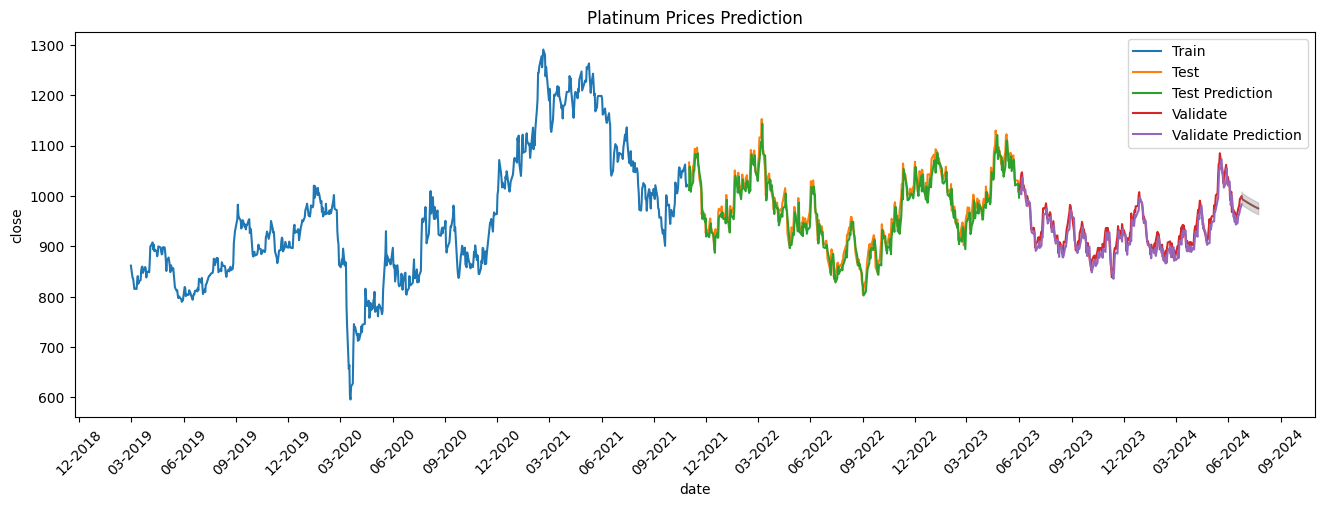

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#   Create a confidence interval for the prediction
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for 95% confidence level

# Create error range for Future Prediction
std_dev = np.std(y_pred_future)  # Standard deviation of future prediction
margin_of_error = z_score * std_dev

# Calculate the confidence interval for Future Prediction
lower_bound = y_pred_future - margin_of_error
upper_bound = y_pred_future + margin_of_error

# Print out the confidence interval value
print("Margin of Error:", margin_of_error)
print("Lower Bound of Future Prediction:", lower_bound)
print("Upper Bound of Future Prediction:", upper_bound)

# Calculate the reliability of the model
mean_prediction = np.mean(y_pred_future)
confidence_interval_range = upper_bound - lower_bound
confidence_score = 1 - (np.mean(confidence_interval_range) / mean_prediction)
print("Confidence Score:", confidence_score)

# Function to calculate confidence interval
def calculate_confidence_interval(predictions, confidence_level=0.95):
    z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for confidence level
    std_dev = np.std(predictions)  # Standard deviation of prediction
    margin_of_error = z_score * std_dev
    lower_bound = predictions - margin_of_error
    upper_bound = predictions + margin_of_error
    return lower_bound, upper_bound, margin_of_error

#   Use the function to calculate the confidence interval for Future Prediction
lower_bound, upper_bound, margin_of_error = calculate_confidence_interval(y_pred_future)

# Convert confidence intervals to DataFrames for plotting convenience
PREDICTIONS_FUTURE_LOWER = pd.DataFrame(lower_bound, columns=['close']).set_index(pd.Series(datelist_future))
PREDICTIONS_FUTURE_UPPER = pd.DataFrame(upper_bound, columns=['close']).set_index(pd.Series(datelist_future))

# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index, train_data.close)
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)
plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('date')
plt.ylabel('close')
plt.title('Platinum Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# x-axis format to show only the year
from matplotlib.dates import DateFormatter, MonthLocator
ax = plt.gca()
ax.xaxis.set_major_formatter(DateFormatter('%m-%Y'))  
ax.xaxis.set_major_locator(MonthLocator(interval=3))
plt.xticks(rotation=45)  
plt.show()

In [45]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  17.073898330765154
MAPE:  1.7361892796643512
RMSE:  21.59653691408333

** Validate **
MAE:  13.950213210027023
MAPE:  1.4854791747709
RMSE:  17.214062463652805
